In [92]:
import statsmodels.api as sm
from scipy.stats import normaltest
import matplotlib.pylab as plt
%matplotlib inline

In [93]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [182]:
from utils.arima_utils import *

In [423]:
model = ArimaModel(pipe='pipe2')

Loading the prepro pipeline


In [424]:
model.fit()

  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              yield   No. Observations:                 3058
Model:             SARIMAX(0, 1, 2)x(1, 0, 1, 12)   Log Likelihood               -5401.855
Date:                            Wed, 06 Apr 2016   AIC                          10859.710
Time:                                    18:46:25   BIC                          11028.424
Sample:                                11-23-2013   HQIC                         10920.337
                                     - 08-09-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0        -0.0921      0.179     -0.515      0.606      -0.443       0.258
feat_1         1.1587      0.041   

 33%|███▎      | 1/3 [00:31<01:03, 31.72s/it]

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              yield   No. Observations:                 1089
Model:             SARIMAX(0, 1, 2)x(1, 0, 1, 12)   Log Likelihood               -1845.838
Date:                            Wed, 06 Apr 2016   AIC                           3747.676
Time:                                    18:46:40   BIC                           3887.481
Sample:                                12-01-2014   HQIC                          3800.591
                                     - 03-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0        -0.0236      0.182     -0.130      0.897      -0.380       0.333
feat_1         2.4605      0.105   

 67%|██████▋   | 2/3 [00:44<00:26, 26.16s/it]

Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              yield   No. Observations:                 1385
Model:             SARIMAX(0, 1, 2)x(1, 0, 1, 12)   Log Likelihood               -1724.530
Date:                            Wed, 06 Apr 2016   AIC                           3505.060
Time:                                    18:46:56   BIC                           3651.597
Sample:                                08-03-2015   HQIC                          3559.868
                                     - 11-26-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0        -0.1797      0.157     -1.148      0.251      -0.486       0.127
feat_1         0.6664      0.032   

RMSE
RMSE - Train set : 1.815; Test set : 1.091
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/submissions_20160406_184658.csv


In [263]:
df = model.df

In [264]:
df0 = df.groupby('group').get_group('group0')

In [265]:
from utils.data_utils import train_test_split

In [266]:
train,test = train_test_split(df0)

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation


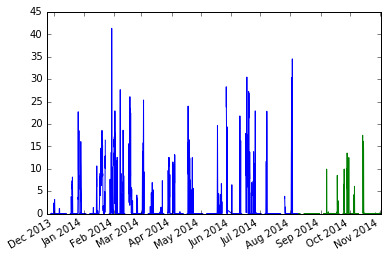

In [267]:
train['yield'].plot()
test['yield'].plot()

In [382]:
mod = sm.tsa.SARIMAX(endog=train['yield'],
                        exog=train[model.regressors],
                        order=(1,1,3))


In [383]:
train_res = mod.fit(maxiter=100)

In [386]:
mod.endog= test['yield']
mod.exog = test[model.regressors]

In [388]:
mod = sm.tsa.SARIMAX(endog=test['yield'],
                        exog=test[model.regressors],
                        order=(1,1,3))

In [389]:
val_res = mod.filter(train_res.params)

In [373]:
pred = val_res.get_prediction().predicted_mean

In [374]:
len(pred),len(test)

(1020, 1020)

In [375]:
test['yield_pred'] = 0
test.loc[test.index,'yield_pred'] = pred.values

In [381]:
dfscore = test[['yield','yield_pred']].dropna()
np.sqrt(mean_squared_error(dfscore['yield'],dfscore['yield_pred']))

1.4563061216043762

In [352]:
mod = sm.tsa.SARIMAX(endog=train['yield'].diff(periods=1)[1:],
                        exog=train[model.regressors].diff(periods=1)[1:],
                        order=(1,0,3))

In [353]:
res = mod.fit(maxiter=100)

In [354]:
print res.aic

10625.8461979


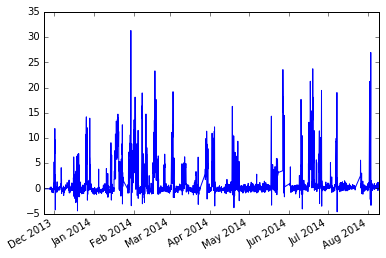

In [253]:
res.predict().plot()

In [245]:
res.aic

nan

In [219]:
sm.tsa.statespace.SARIMAX?

In [191]:
model.fit()

  0%|          | 0/3 [00:00<?, ?it/s]/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:                  yield   No. Observations:                 4078
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -6960.077
Date:                Wed, 06 Apr 2016   AIC                          13944.155
Time:                        16:46:59   BIC                          14019.915
Sample:                    11-23-2013   HQIC                         13970.984
                         - 11-02-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0        -0.1375      0.072     -1.913      0.056      -0.278       0.003
feat_1         0.0169      0.000     39.135      0.000       0.016       0.018
feat_2        -0.0401      0.096     -0.417      0.6

 33%|███▎      | 1/3 [00:07<00:14,  7.10s/it]/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:                  yield   No. Observations:                 1452
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -2384.403
Date:                Wed, 06 Apr 2016   AIC                           4792.805
Time:                        16:47:02   BIC                           4856.173
Sample:                    12-01-2014   HQIC                          4816.451
                         - 03-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0        -0.0195      0.071     -0.274      0.784      -0.159       0.120
feat_1         0.0558      0.001     37.657      0.000       0.053       0.059
feat_2         2.6668      0.925      2.884      0.0

 67%|██████▋   | 2/3 [00:10<00:05,  5.90s/it]/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:                  yield   No. Observations:                 1847
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -2023.714
Date:                Wed, 06 Apr 2016   AIC                           4071.427
Time:                        16:47:05   BIC                           4137.683
Sample:                    08-03-2015   HQIC                          4095.853
                         - 01-04-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0        -0.1034      0.058     -1.789      0.074      -0.217       0.010
feat_1         0.0136      0.000     35.047      0.000       0.013       0.014
feat_2         6.2116      0.408     15.206      0.0

RMSE
1.86924739431
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/submissions_20160406_164705.csv


In [192]:
model.get_score()

1.8692473943100063

In [149]:
df0 = model.df.groupby('group').get_group('group0')
order,seasonal_order= model.fit_best_arima(x=df0['yield'],xreg=df0[model.regressors])

In [409]:
a = pd.read_csv('/Users/thorey/Documents/project/competition/fognet/models/bbking/arima/submissions_20160406_173258.csv',index_col=0)

In [410]:
b = pd.read_csv('/Users/thorey/Documents/project/competition/fognet/models/bbking/arima/submissions_20160406_183518.csv',index_col=0)

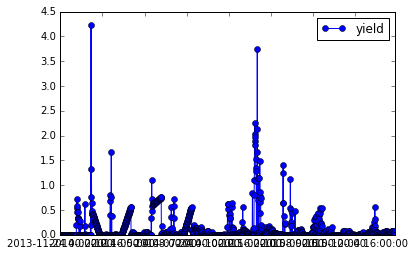

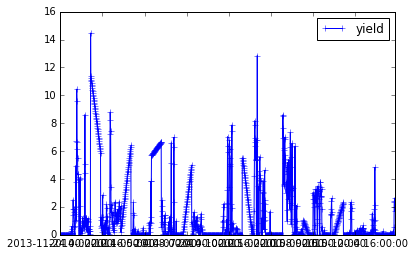

In [411]:
a.plot(marker='o')
b.plot(marker='+')

In [190]:
len(a)

1590

In [150]:
order,seasonal_order

([0, 0, 2], [0, 0, 0, 1])

In [166]:
df0 = model.df.groupby('group').get_group('group0')
#order,seasonal_order= model.fit_best_arima(x=df0['yield'],xreg=df0[model.regressors])
mod = sm.tsa.SARIMAX(endog=df0['yield'],exog=df0[model.regressors],order=(0,1,2))
res = mod.fit()
res.summary()

/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  yield   No. Observations:                 4078
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -6960.077
Date:                Wed, 06 Apr 2016   AIC                          13944.155
Time:                        16:32:17   BIC                          14019.915
Sample:                    11-23-2013   HQIC                         13970.984
                         - 11-02-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0        -0.1375      0.072     -1.913      0.056      -0.278       0.003
feat_1         0.0169      0.000     39.135      0.000       0.016       0.018
feat_2        -0.0401      0.096     -0.417      0.677      -0.229       0.149
feat_3         0.1060      0.034      3.144      0.002       0.040       0.172
feat_4        -1.4454      0.234     -6.171      0.000      -1.905      -0.986
feat_5         2.0411      0.249      8.210      0.000       1.554       2.528
feat_6         1.0233      0.061     16.757      0.000       0.904       1.143
feat_7         0.0035      0.001      6.906      0.000       0.003       0.004
feat_8         1.0118      0.355      2.853      0.004       0.317       1.707
ma.L1         -0.2335      0.008    -29.834      0.000      -0.249      -0.218
ma.L2         -0.3747      0.007    -52.170      0.000      -0.389      -0.361
sigma2         4.1563      0.039    106.831      0.000       4.080       4.233
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):             75311.81
Prob(Q):                               nan   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                             1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [180]:
df = model.df

In [181]:
model.get_score()

1.8692473943100063

In [159]:
res = mod.fit()

/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


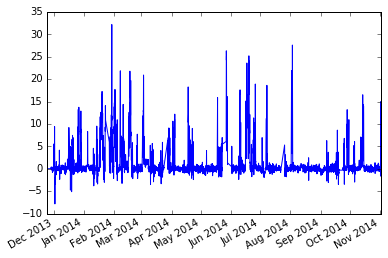

In [160]:
res.get_prediction().predicted_mean.plot()

In [153]:
print(res.summary())

ValueError: array must not contain infs or NaNs

In [118]:
mod = sm.tsa.statespace.SARIMAX(endog=df0['yield'],
                                  exog=df0[model.regressors],
                                  order=(5,1,0),
                                  seasonal_order=seasonal_order)
results = mod.fit()
print(results.summary())

/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:                  yield   No. Observations:                 4078
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -6952.844
Date:                Wed, 06 Apr 2016   AIC                          13935.689
Time:                        16:21:38   BIC                          14030.389
Sample:                    11-23-2013   HQIC                         13969.225
                         - 11-02-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0        -0.2094      0.070     -2.986      0.003      -0.347      -0.072
feat_1         0.0189      0.000     46.753      0.000       0.018       0.020
feat_2        -0.0301      0.091     -0.332      0.7

In [84]:
 dfg = model.df.groupby('group')

In [88]:
len(dfg.get_group('group0')[model.regressors])

4078

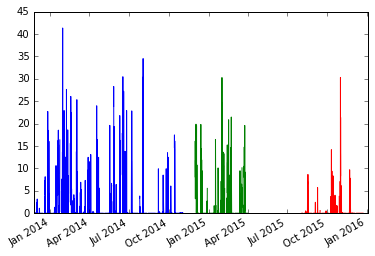

In [60]:
for name,gp in dfg:
    gp['yield'].plot()

In [72]:
dfpipe.head(1)

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,gusts_ms,...,aga_U,aga_DD,aga_Ff,aga_ff10,aga_WW,aga_W'W',aga_c,aga_VV,aga_Td,group
2013-11-23 16:00:00,-0.537759,-0.371289,-0.096575,-1.101882,0.117927,0.240507,-0.509434,-0.068357,-0.363747,NaN,...,57,Wind blowing from the west-southwest,5,NaN,NaN,NaN,NaN,10.0 and more,14,group0


In [78]:
dfg.get_group('group0').head(1)

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,gusts_ms,...,aga_U,aga_DD,aga_Ff,aga_ff10,aga_WW,aga_W'W',aga_c,aga_VV,aga_Td,group
2013-11-23 16:00:00,-0.549137,-0.393277,-0.074508,-1.015748,-0.00165,0.115107,-0.713014,-0.10931,-0.47772,NaN,...,57,Wind blowing from the west-southwest,5,NaN,NaN,NaN,NaN,10.0 and more,14,group0


In [61]:
model.partial_fit(dfg.get_group('group0'))

2013-11-23 16:00:00   -2.066329
2013-11-23 18:00:00         NaN
2013-11-23 20:00:00         NaN
2013-11-23 22:00:00         NaN
2013-11-24 00:00:00         NaN
2013-11-24 02:00:00         NaN
2013-11-24 04:00:00         NaN
2013-11-24 06:00:00         NaN
2013-11-24 08:00:00         NaN
2013-11-24 10:00:00         NaN
2013-11-24 12:00:00         NaN
2013-11-24 14:00:00         NaN
2013-11-24 16:00:00         NaN
2013-11-24 18:00:00         NaN
2013-11-24 20:00:00         NaN
2013-11-24 22:00:00         NaN
2013-11-25 00:00:00         NaN
2013-11-25 02:00:00         NaN
2013-11-25 04:00:00         NaN
2013-11-25 06:00:00         NaN
2013-11-25 08:00:00         NaN
2013-11-25 10:00:00         NaN
2013-11-25 12:00:00         NaN
2013-11-25 14:00:00         NaN
2013-11-25 16:00:00         NaN
2013-11-25 18:00:00         NaN
2013-11-25 20:00:00         NaN
2013-11-25 22:00:00         NaN
2013-11-26 00:00:00         NaN
2013-11-26 02:00:00         NaN
                         ...   
2014-10-

In [51]:
model.df['yield_pred']

KeyError: 'yield_pred'

NonGuiException: 

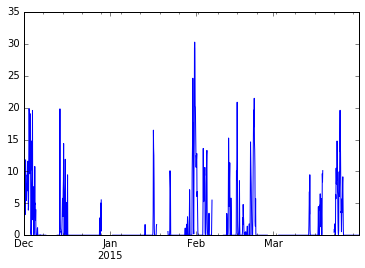

In [39]:
df1['yield'].plot()

In [16]:
model.fit()

  0%|          | 0/3 [00:00<?, ?it/s]/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 33%|███▎      | 1/3 [00:27<00:55, 27.74s/it]

ValueError: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.

In [273]:
from utils.data_utils import *
import seaborn as sns


In [336]:
# R stuff
import rpy2.robjects as robj
from rpy2.robjects import pandas2ri
pandas2ri.activate()
rforecast = importr('forecast')

In [261]:
%matplotlib inline

In [62]:
df = build_dataset()
def replace_yield(x):
    if x == -1:
        return np.nan
    else:
        return x
df['yield'] = map(replace_yield,df['yield'])

TODO LIST

- Modelling of each series independantly 
- Modelling of whole series agaist yield

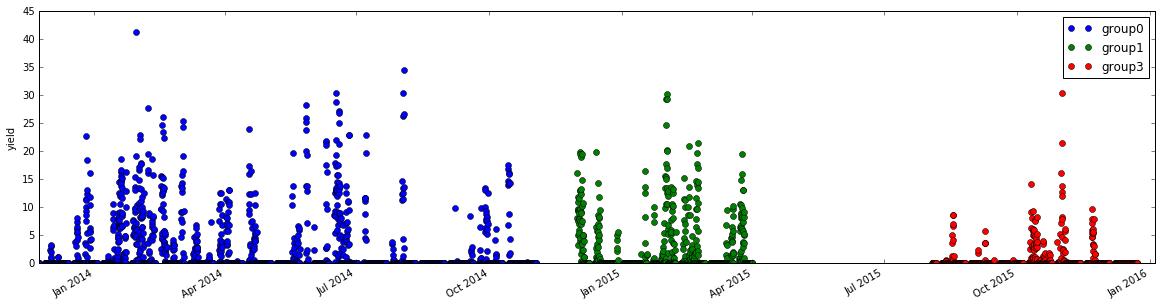

In [63]:
fig,ax = plt.subplots(figsize=(20,5))
for name,gp in add_group_column_to_data(df).groupby('group'):
    gp['yield'].plot(label =name,ax=ax,marker='o',linewidth=0)
ax.legend()
ax.set_ylabel('yield')

# Group0 

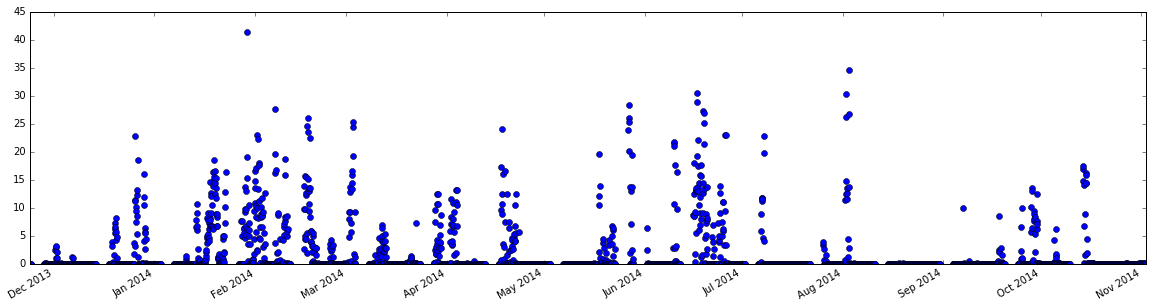

In [64]:
#get the data for first group
df0 = add_group_column_to_data(df).groupby('group').get_group('group0')
fig,ax = plt.subplots(figsize=(20,5))
df0['yield'].plot(marker='o',linewidth=0)

KeyError: 'feat_12'

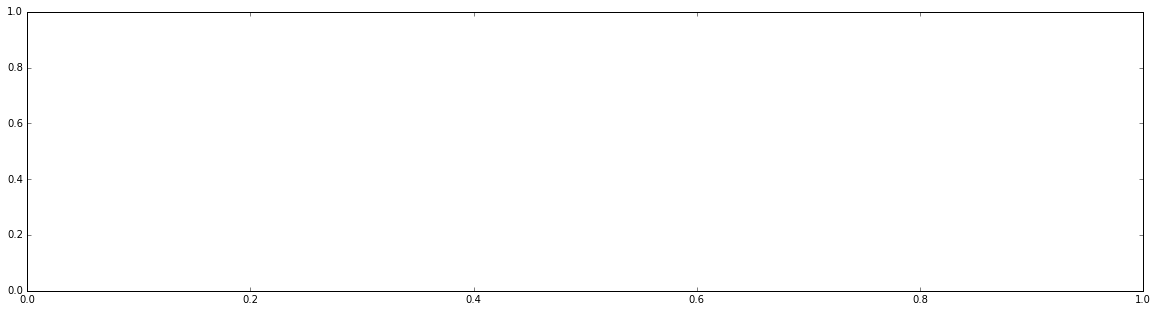

In [65]:
fig,ax = plt.subplots(figsize=(20,5))
from utils import pipe_def
pipeline = build_entire_pipeline(pipe_def.pipe0['pipe_list'],pipe_def.pipe0['pipe_kwargs'],df0)
dfpipe = pipeline.fit_transform(df0)
regressors = [f for f in dfpipe.columns if f.split('_')[0]=='feat' and f not in ['feat_35']]
dfpipe['feat_12'].plot(ax=ax)

In [354]:
model = sm.tsa.statespace.SARIMAX(endog=dfpipe['yield'],exog=dfpipe[regressors],order=(0,1,1))
resultat = model.fit()

In [355]:
print(resultat.summary())

                           Statespace Model Results                           
Dep. Variable:                  yield   No. Observations:                 4078
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -7094.785
Date:                Wed, 06 Apr 2016   AIC                          14211.571
Time:                        14:38:53   BIC                          14281.018
Sample:                    11-23-2013   HQIC                         14236.164
                         - 11-02-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0        -0.4352      0.135     -3.212      0.001      -0.701      -0.170
feat_1         1.0854      0.020     53.424      0.000       1.046       1.125
feat_2        -0.0160      0.104     -0.154      0.8

In [79]:
dfpipe = dfg.get_group('group0')
def fit_best_ARIMA(x,xreg):
    robj.globalenv['xregressors'] = xreg
    robj.globalenv['x'] = x
    robj.r('fit <- auto.arima(x,xreg=xregressors)')
    arma = robj.r('fit$arma')
    arma_names = ['AR','MA','Seasonal_AR','Seasonal_AM','Period','S','Seasonal_S']
    return dict(zip(arma_names,arma))
best_arima = fit_best_ARIMA(dfpipe['yield'],dfpipe[regressors])
# Fit the model with python
order= map(int,(best_arima['AR'],
        best_arima['S'],
        best_arima['MA']))
seasonal_order = map(int,(best_arima['Seasonal_AR'],
                  best_arima['Seasonal_S'],
                  best_arima['Seasonal_AM'],
                 best_arima['Period']))
model = sm.tsa.statespace.SARIMAX(endog=dfpipe['yield'],
                                  exog=dfpipe[regressors],
                                  order=order,
                                  seasonal_order=seasonal_order)
resultat = model.fit()

In [80]:
print(resultat.summary())

ValueError: array must not contain infs or NaNs

In [471]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [472]:
from tqdm import *

In [473]:
from utils.arima_utils import *

In [475]:
model = ModelArima()

In [466]:
model.init_data()

Loading the prepro pipeline
{'pipe_kwargs': {'macro_aga': {'FeatureSelector__features': ['aga_Ff',
                                                             "aga_W'W'",
                                                             'aga_DD',
                                                             'aga_ff10',
                                                             'aga_VV',
                                                             'aga_WW',
                                                             'aga_c',
                                                             'aga_Td',
                                                             'aga_U',
                                                             'aga_T',
                                                             'aga_P',
                                                             'aga_P0'],
                               'FillRemainingNaN__method': 'bfill',
                               'MissingValueInputer

In [469]:
from utils.arima_utils import *

In [443]:
prediction = resultat.get_prediction().predicted_mean

In [444]:
def threshold_zero(x):
    if x<0:
        return 0
    else:
        return x
    

In [445]:
dfpipe['yield_pred'] = map(threshold_zero,prediction)

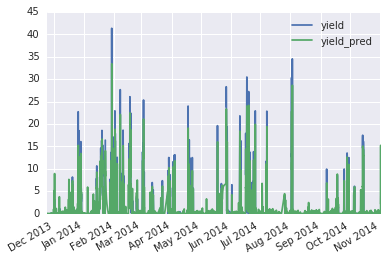

In [446]:
dfpipe[['yield','yield_pred']].plot()

In [447]:
from sklearn.metrics import mean_squared_error

In [448]:
pred = dfpipe.loc[dfpipe['yield'].dropna().index][['type','yield','yield_pred']]

In [449]:
np.sqrt(mean_squared_error(pred['yield'],pred.yield_pred))

1.9455637756766058

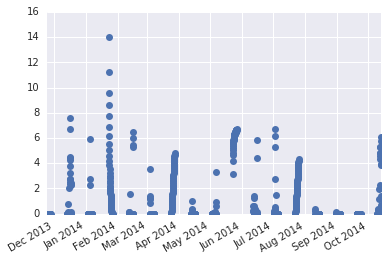

In [450]:
dfpipe[dfpipe['type']=='prediction'].yield_pred.plot(marker  ='o',linewidth=0)

# Group 1 

In [ ]:
class ModelArima(object):
    
    def __init__(self):
        self.df = 
        
        

# ARIMA modelling

In [ ]:
class State_Model(object):
    def __init__(self):
        self.regressor

In [221]:
df = build_dataset()
def replace_yield(x):
    if x == -1:
        return np.nan
    else:
        return x
df['yield'] = map(replace_yield,df['yield'])

In [114]:
from utils.preprocessing import build_entire_pipeline

In [112]:
from utils import pipe_def

In [133]:
pipeline = build_entire_pipeline(pipe_def.pipe1['pipe_list'],pipe_def.pipe1['pipe_kwargs'],df)

In [134]:
dfn = pipeline.fit_transform(df)

In [146]:
regressor = [f for f in dfn.columns if f.split('_')[0]=='feat' and f not in ['feat_14']]

In [222]:
mod = sm.tsa.statespace.SARIMAX(endog=dfn['yield'],exog=dfn[regressor],order=(1,1,1))
res = mod.fit()
print(res.summary())

/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:                  yield   No. Observations:                 4078
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -6906.674
Date:                Wed, 06 Apr 2016   AIC                          13889.349
Time:                        12:42:47   BIC                          14129.256
Sample:                    11-23-2013   HQIC                         13974.306
                         - 11-02-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0         0.3893      0.490      0.795      0.426      -0.570       1.349
feat_1        -1.4559      5.061     -0.288      0.774     -11.376       8.464
feat_2         1.7572      5.096      0.345      0.7

In [224]:
pred = res.get_prediction()

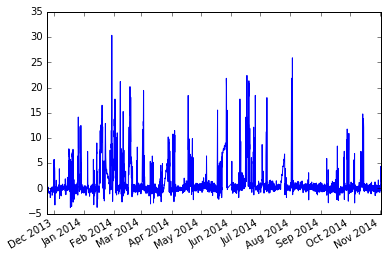

In [232]:
pred.predicted_mean.plot()

In [244]:
dfn['yield_pred'] = map(threshold,pred.predicted_mean)

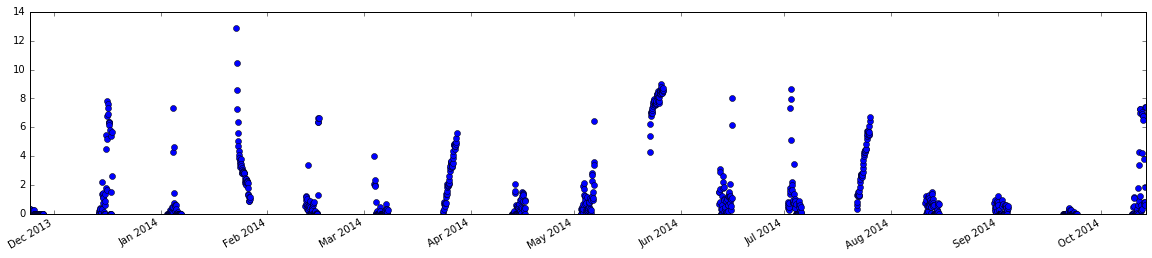

In [248]:
fig = plt.figure(figsize=(20,4))
dfn[dfn['type']=='prediction']['yield_pred'].plot(marker='o',linewidth=0)

In [184]:
from utils.data_utils import *

In [236]:
len(dfn['yield_pred'])

4078

In [176]:
from utils.result_utils import *
root = '/Users/thorey/Documents/project/competition/fognet/models/clavius/lstm'
base_model = os.path.join(root,'model_1')
dfmodels = get_result(base_model,hp = ['hiddens','lr','reg','nb_layers','update_rule','stride','seq_length'])
def get_submission_df(row):
    name = os.path.join(row.root,row.model)
    sub = [f for f in os.listdir(name) if f.split('_')[0] == 'submissions'][0]
    name_sub = os.path.join(name,sub)
    df = pd.read_csv(name_sub,index_col=0)
    return df
df2 = get_submission_df(dfmodels.iloc[0])

(0, 40)

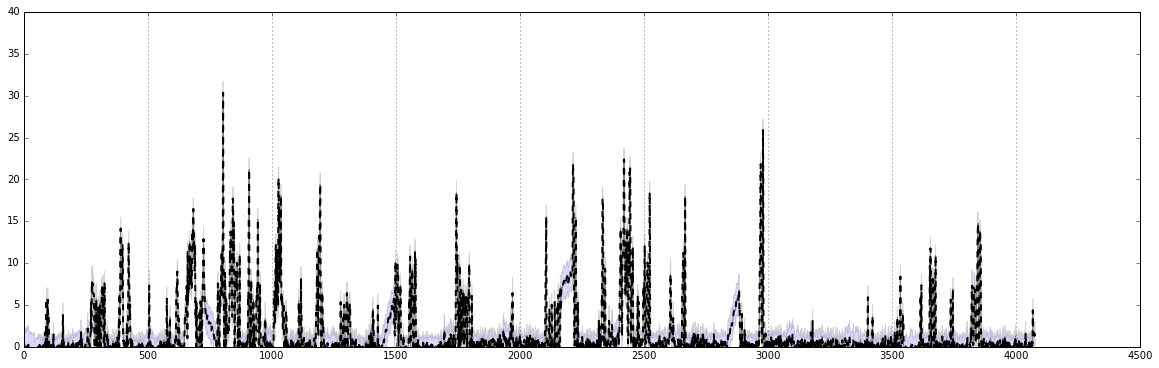

In [239]:
predict = res.get_prediction()
idx = np.arange(len(predict.predicted_mean))
predict_ci = predict.conf_int(alpha=0.5)

fig, ax = plt.subplots(figsize=(20,6))
ax.xaxis.grid()
#ax.plot(idx,df.humidity.values(), 'k.')

# Plot
ax.plot(idx, predict.predicted_mean, 'gray')
ax.plot(idx, predict.predicted_mean, 'k--', linestyle='--', linewidth=2)
ax.fill_between(idx, predict_ci.iloc[:, 0], predict_ci.iloc[:, 1], alpha=0.15)
ax.set_ylim(0,40)

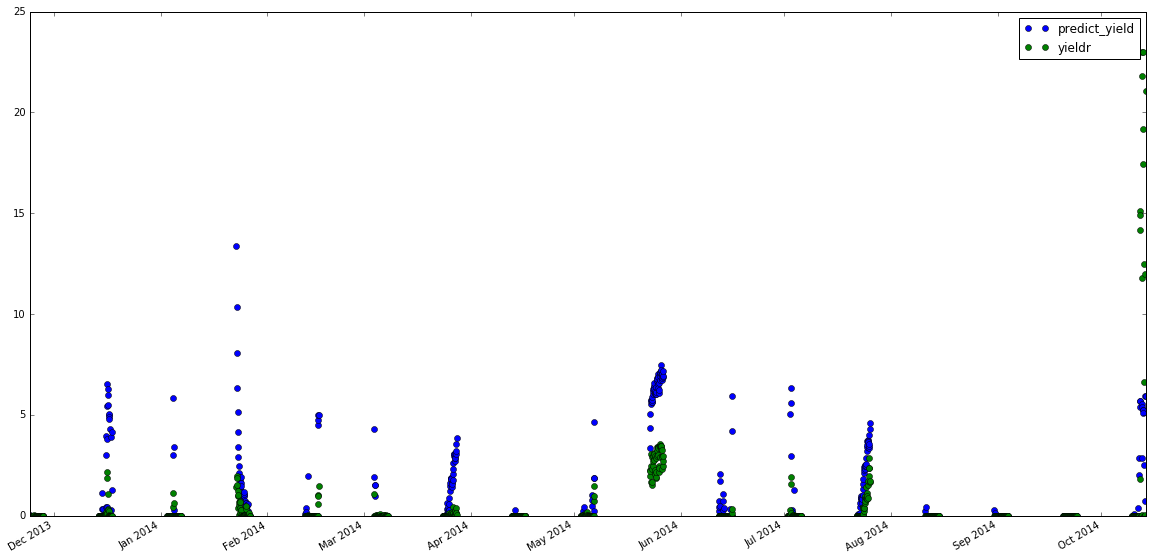

In [212]:
fig,ax = plt.subplots(figsize=(20,10))
dffinal[dffinal['type']=='prediction'][['predict_yield','yieldr']].plot(linewidth=0,marker='o',ax=ax)

In [217]:
dffinal[dffinal['type']=='prediction']['predict_yield'].to_csv('submission.csv')

In [220]:
len(dffinal[dffinal['type']=='prediction']['predict_yield']),len(df2)

(816, 1590)

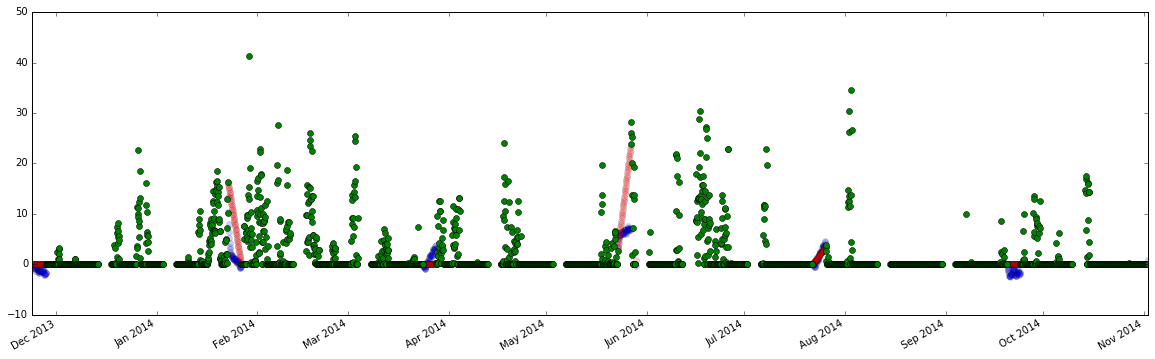

In [155]:
fig, ax = plt.subplots(figsize=(20,6))
ts.loc[nan_dates].plot(marker ='o',linewidth=0,alpha=0.2)
df['yield'].interpolate(method='time').loc[nan_dates].plot(marker='o',linewidth=0,color='r',alpha=0.2)
df['yield'][~df.index.isin(nan_dates)].plot(color='g',linewidth=0,marker='o')

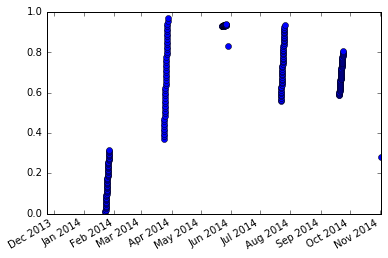

In [81]:
df.humidity.interpolate(method='time').loc[nan_dates].plot(marker='o',linewidth=0)